### Butler Volmer Explicit Equations error
This brief study will show which explicit model for BV equation for Vactivation calculation is the closest to the actual BV. 

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [21]:
import BV

In [23]:
BV.IV_new_2

<function BV.IV_new_2(oT, fT, J, pO2air, pN2air, pH2, pH2O, pCO, pCO2, pCH4, pN2, pSys, BV_alpha, BV_prexp, BV_Eact, V_loss=0.0, R_cont=0.0, DsurfH2th1=0.1, DsurfH2th2=4.51e-05, Fkn=True, d0_am=0.28, d0_cm=0.28, th_e=10)>

In [14]:
# environment parameters
R=8.314
F=96485.0

oT =700+273.15      #Temperature oxidant (K)
fT =700+273.15      #Temperature fuel (K)
Tk=(oT+fT)/2.0
Tc=Tk-273.0

pO2air=0.3          #Air side partial pressure O2 (atm)
pN2air =0.7         #Air side partial pressure N2 (atm)
# pH2 = 0.4375        #Fuel side partial pressure H2 (atm)
# pH2O =0.3125        #Fuel side partial pressure H2O (atm)
# pCO=0.0625          #Fuel side partial pressure CO (atm)
# pCO2=0.0625         #Fuel side partial pressure CO2 (atm)
# pCH4=0.125          #Fuel side partial pressure CH4 (atm)
# pN2=0.0             #Fuel side partial pressure N2 (atm)
pH2 = 0.97        #Fuel side partial pressure H2 (atm)
pH2O =0.03        #Fuel side partial pressure H2O (atm)
pCO=0.0         #Fuel side partial pressure CO (atm)
pCO2=0.0         #Fuel side partial pressure CO2 (atm)
pCH4=0.0          #Fuel side partial pressure CH4 (atm)
pN2=0.0             #Fuel side partial pressure N2 (atm)
pSys=1.0            #System pressure (atm)  

# fuel cell property parameters
de_a = 0.61           #diameter of electrically conducting particles for anode 0.2-0.8
ne_a = 0.2              #number fraction of electrically conducting particles for anode 0.2-0.6
alpha_a = 0.475/0.61      #the particle size ratio of ionic to electronic conducting particles for anode 0.5-2.0
de_c = de_a          #**   #for cathode
ne_c = ne_a           #**  #for cathode
alpha_c = alpha_a     #**  #for cathode
d0_am = 0.228 # pore diameter [microm]
d0_cm = d0_am


# adjustable parameters for B-V loss (starting with these for optimization)
BV_alpha = 0.43236 #0.43236/3 **
BV_prexp = 5639 #**
BV_Eact = 79616 #**


J=0.1

In [27]:
BV.IV_new_2(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
             BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
             DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)

NameError: name 'math' is not defined

In [ ]:
#BV Summary:
#Function inputs for all functions: 
#def IV_new_2(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
#             BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
#             DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)
#IV_new_2(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
#             BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
#             DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)

In [19]:
J=np.linspace(0,2,1000)

# environment parameters
R=8.314
F=96485.0

oT =700+273.15      #Temperature oxidant (K)
fT =700+273.15      #Temperature fuel (K)
Tk=(oT+fT)/2.0
Tc=Tk-273.0

[0.00000000e+00 5.13905870e-08 1.02781174e-07 1.54171761e-07
 2.05562348e-07 2.56952935e-07 3.08343522e-07 3.59734109e-07
 4.11124696e-07 4.62515282e-07 5.13905869e-07 5.65296456e-07
 6.16687043e-07 6.68077630e-07 7.19468217e-07 7.70858804e-07
 8.22249391e-07 8.73639978e-07 9.25030565e-07 9.76421152e-07
 1.02781174e-06 1.07920233e-06 1.13059291e-06 1.18198350e-06
 1.23337409e-06 1.28476467e-06 1.33615526e-06 1.38754585e-06
 1.43893643e-06 1.49032702e-06 1.54171761e-06 1.59310820e-06
 1.64449878e-06 1.69588937e-06 1.74727996e-06 1.79867054e-06
 1.85006113e-06 1.90145172e-06 1.95284230e-06 2.00423289e-06
 2.05562348e-06 2.10701406e-06 2.15840465e-06 2.20979524e-06
 2.26118583e-06 2.31257641e-06 2.36396700e-06 2.41535759e-06
 2.46674817e-06 2.51813876e-06 2.56952935e-06 2.62091993e-06
 2.67231052e-06 2.72370111e-06 2.77509170e-06 2.82648228e-06
 2.87787287e-06 2.92926346e-06 2.98065404e-06 3.03204463e-06
 3.08343522e-06 3.13482580e-06 3.18621639e-06 3.23760698e-06
 3.28899756e-06 3.340388

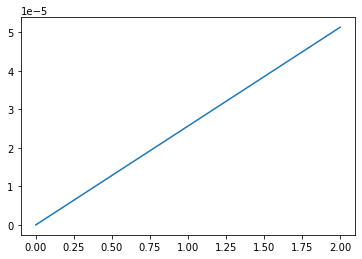

In [20]:
#PNNL Original Model
BV_prexp=9.6620275
BV_Eact=3.35955954
BV_alpha=0.48646415
i0=BV_prexp*math.exp(-BV_Eact)
BV=np.zeros(len(J))

for i in range(len(J)):
    BV[i]=(R*Tk/BV_alpha/F)*math.log((J[i]/2.0/(i0*10000))+math.sqrt((J[i]/2.0/(i0*10000))**2+1))

print(BV)

plt.plot(J,BV)

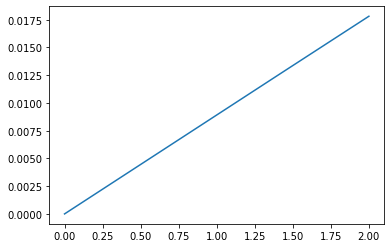

In [21]:
#Same as PNNL original model in hyperbolic #perform speed testing on the calculation
i0=BV_prexp*math.exp(-BV_Eact/R/Tk)

BV=np.zeros(len(J))

for i in range(len(J)):
    BV[i]=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0)
    
plt.plot(J,BV)

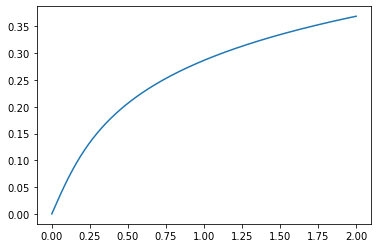

In [22]:
#Hyperbolic sine equation. Meng.et
Eact_a = 1e5
BV_alpha=7.00000000e-01
Prex_A=1.08110742e+00
Prex_C=2.36148376e+02
pH2= 0.97
pH2O= 0.03
pSys= 1
Keq_dHo=-56930.0
Keq_A=6.75
Keq_B=-0.64
Keq_C=-0.08
Keq_L=-8.74
Keq_dG=Keq_dHo+Keq_A*Tk*math.log10(Tk)+Keq_B*Tk*Tk/1000+Keq_C*100000/Tk+Keq_L*Tk
Kequib=math.exp(-Keq_dG*4.184/R/Tk)
pO2anode=(pH2O/Kequib/pH2)**2

i0a=Prex_A*1e10*((pH2*pH2O)/pSys**2)*math.exp(-Eact_a/R/Tk) #prex_a = 1.344 (e10)
#i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
Eact_c = 1.2e5
i0c=Prex_C*1e9*(pO2anode/pSys)**(0.25)*math.exp(-Eact_c/R/Tk) #prex_c = 2.051 (e9)

for i in range(len(J)):
    Vact_a=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0a)
    Vact_c=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0c)
    BV[i]=Vact_a+Vact_c
plt.plot(J,BV)

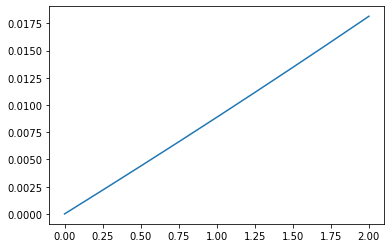

In [23]:
#second expansion
i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
#BV=(R*Tk/BV_alpha/F)*math.asinh(J/2/i0)
#Using quadratic formula derived from 2nd order taylor expansion.
AA=(F/R/Tk)**2*(-2*BV_alpha+1)*0.5
BB= F/R/Tk
CC=-J/i0
BV=np.zeros(len(CC))
for i in range(len(CC)):
    BV[i]= (-BB+math.sqrt((BB**2)-4*AA*CC[i]))/(2*AA)

plt.plot(J,BV)
    
#explicit Vact from 2nd order Taylor expansion
#BV=(-BB+math.sqrt((BB**2)-4*AA*CC))/(2*AA)

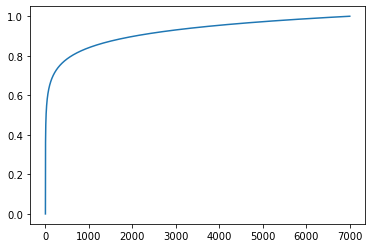

In [26]:
#Original BV equation ranging Vact from 0 to 0.25

BV_prexp=9.6620275/10
BV_Eact=3.35955954
BV_alpha=0.48646415
i0=BV_prexp*math.exp(-BV_Eact)
Vact = np.linspace(0,1,1000)
J=np.zeros(len(Vact))

for i in range(len(J)):
    J[i]=-i0*(math.exp(-BV_alpha*2*Vact[i]*F/R/Tk)-math.exp((1-BV_alpha)*Vact[i]*2*F/R/Tk))

plt.plot(J,Vact)

In [25]:
#second expansion+tafel\]

i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
if J/i0 < 4:
#BV=(R*Tk/BV_alpha/F)*math.asinh(J/2/i0)
#Using quadratic formula derived from 2nd order taylor expansion.
    AA=(F/R/Tk)**2*(-2*BV_alpha+1)*0.5
    BB= F/R/Tk
    CC=-J/i0
    #explicit Vact from 2nd order Taylor expansion
    BV=(-BB+math.sqrt((BB**2)-4*AA*CC))/(2*AA)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

NameError: name 'IV_new_2' is not defined

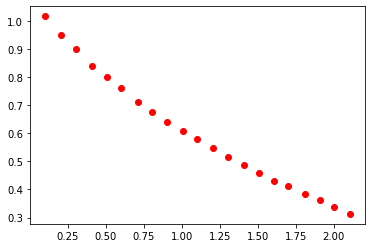

In [9]:
# plot exp data
#filename = './ExperimentalData/JM2017/700.csv'
#filename = './ExperimentalData/BP2020/AllData_BP.csv'
filename = './ExperimentalData/BP2020/t8/700.csv'
data = np.loadtxt(open(filename, "rb"), delimiter=",", skiprows=1)
plt.plot(data[:,0], data[:,1], 'r'+'o', label = 'EXP '+str(700)) #J vs V

# initialize Jlist and Vlist
Jlist=np.linspace(np.amin(data[:,0]), np.amax(data[:,0]), num=20)   #Current density, unit [A/cm2]
Vlist = np.zeros(20)
####Needs to be completed
# plot pred data
for j in range(20):
    Vlist[j], Voc, Ohmic, BV, Cath, Anode = IV_new_2(oT,fT,Jlist[j],pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                                                   result.x[0],result.x[1],result.x[2],
                                                   result.x[3], result.x[4], 0.1, 4.51e-5,
                                                   True,result.x[5],result.x[6])
plt.plot(Jlist, Vlist, 'r' +'-', label = 'IV Pred '+str(700))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xlim(-0.1, 1.1)
plt.ylim(0.4, 1.1)
# ymin, ymax = plt.ylim()
# plt.ylim(ymin-(ymax-ymin)*0.0, ymax+(ymax-ymin)*0.0)
plt.xlabel('Current Density, J [A/cm2]', fontsize = 15)
plt.ylabel('Voltage, V [V]', fontsize = 15)
plt.title('EXP. VS. IV_new', fontsize = 15)